**Name -: Nihaal Patel**

**Roll No.-: 045035 Section-H (BDA-04)**



---



# **Machine Learning For Managers (Term-03)**

# **Project -02**



---



# **Project Title -:**

# **Optimizing Urban Traffic Flow through Supervised Machine Learning > Classification & Regression > Logistic Regression | Support Vector Machine | Decision Tree | K Nearest Neighbor**

###**"Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption."**



---



###**This Project consists of broadly 2 sections-:**

**PART A-** CODING & OUTPUTS

**PART B-** PROJECT REPORT



---



# **PART A- CODING & OUTPUTS**



---



###**Importing & Loading Libraries**

In [ ]:
# Install PyDataset
!pip install pydataset

# @title load library { display-mode: "form" }
# Load IPython extension for measuring time
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=e7c058adfa701ad48b84f4bc425a681141f6c304d7f7b394b8fda5de842c1b13
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00
time: 6.74 s (started: 2024-04-13 19:56:06 +00:00)


In [ ]:
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree

from memory_profiler import memory_usage
import time

## Data Preprocessing Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score

## Machine Learning Models and Evaluation Metrics
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline

# Measure memory and RAM usage
%memit

peak memory: 208.27 MiB, increment: 0.00 MiB
time: 303 ms (started: 2024-04-13 19:57:28 +00:00)


In [ ]:
# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 101 ms (started: 2024-04-13 19:57:32 +00:00)




---



###**Data Imporitng & Reading**

In [ ]:
# Import & Read Dataset
file_path = '/content/Data.csv'

df = pd.read_csv(file_path)

# Display & Describe Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53901 entries, 0 to 53900
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  53901 non-null  int64  
 1   cluster_number         53901 non-null  int64  
 2   City                   53901 non-null  object 
 3   Vehicle Type           53901 non-null  object 
 4   Weather                53901 non-null  object 
 5   Economic Condition     53901 non-null  object 
 6   Day Of Week            53901 non-null  object 
 7   Hour Of Day            53901 non-null  int64  
 8   Speed                  53901 non-null  float64
 9   Is Peak Hour           53901 non-null  int64  
 10  Random Event Occurred  53901 non-null  int64  
 11  Energy Consumption     53901 non-null  float64
 12  Traffic Density        53901 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.3+ MB
time: 154 ms (started: 2024-04-13 19:57:40 +00:00

#### **Categorical Variables**

In [ ]:
# Subset of Categorical Variables
df_cat = df[['index','cluster_number','City', 'Weather', 'Economic Condition', 'Day Of Week', 'Vehicle Type']]
df_cat

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,0,2,SolarisVille,Snowy,Stable,Sunday,Drone
1,1,1,AquaCity,Solar Flare,Recession,Wednesday,Flying Car
2,2,1,Neuroburg,Solar Flare,Recession,Wednesday,Autonomous Vehicle
3,3,0,Ecoopolis,Clear,Booming,Thursday,Drone
4,4,2,AquaCity,Solar Flare,Stable,Saturday,Autonomous Vehicle
...,...,...,...,...,...,...,...
53896,53896,2,MetropolisX,Snowy,Booming,Friday,Autonomous Vehicle
53897,53897,0,Neuroburg,Electromagnetic Storm,Recession,Tuesday,Autonomous Vehicle
53898,53898,1,AquaCity,Solar Flare,Booming,Saturday,Autonomous Vehicle
53899,53899,1,MetropolisX,Solar Flare,Recession,Saturday,Autonomous Vehicle


time: 135 ms (started: 2024-04-13 19:57:47 +00:00)


####**Non-Categorical Variables**

In [ ]:
# Subset of Non-Categorical Variables
df_noncat = df[['Speed', 'Energy Consumption', 'Traffic Density','Is Peak Hour']]
df_noncat

,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,29.4268,14.7134,0.5241,0
1,118.8000,143.5682,0.3208,0
2,100.3904,91.2640,0.0415,0
3,76.8000,46.0753,0.1811,1
4,45.2176,40.1934,0.4544,0
...,...,...,...,...
53896,45.8221,43.8489,0.4784,0
53897,38.7085,37.0417,0.0424,0
53898,90.7418,72.5934,0.5811,0
53899,60.8918,87.8670,0.1985,0


time: 35 ms (started: 2024-04-13 19:57:51 +00:00)


####**b.) Descriptive Statistics of Categorical Variables**

In [ ]:
#For City
City_stats = pd.concat([df['City'].value_counts(), df['City'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
City_stats

,City,count,percentage
0,Ecoopolis,9129,17.0
1,AquaCity,9049,17.0
2,SolarisVille,9013,17.0
3,TechHaven,8947,17.0
4,MetropolisX,8921,17.0
5,Neuroburg,8842,16.0


time: 23.7 ms (started: 2024-04-13 19:58:01 +00:00)


In [ ]:
#For Weather
Weather_stats = pd.concat([df['Weather'].value_counts(), df['Weather'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Weather_stats

,Weather,count,percentage
0,Rainy,10922,20.0
1,Electromagnetic Storm,10846,20.0
2,Snowy,10759,20.0
3,Clear,10727,20.0
4,Solar Flare,10647,20.0


time: 21.5 ms (started: 2024-04-13 19:58:04 +00:00)


In [ ]:
#For Economic_Condition
Economic_Condition_stats = pd.concat([df['Economic Condition'].value_counts(), df['Economic Condition'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Economic_Condition_stats

,Economic Condition,count,percentage
0,Stable,18050,33.0
1,Recession,17953,33.0
2,Booming,17898,33.0


time: 21.6 ms (started: 2024-04-13 19:58:07 +00:00)


In [ ]:
#For Day Of Week
Day_Of_Week_stats = pd.concat([df['Day Of Week'].value_counts(), df['Day Of Week'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Day_Of_Week_stats

,Day Of Week,count,percentage
0,Thursday,7763,14.0
1,Tuesday,7749,14.0
2,Saturday,7746,14.0
3,Wednesday,7714,14.0
4,Monday,7665,14.0
5,Sunday,7646,14.0
6,Friday,7618,14.0


time: 21.6 ms (started: 2024-04-13 19:58:10 +00:00)


In [ ]:
#For Vehicle Type
Vehicle_Type_stats = pd.concat([df['Vehicle Type'].value_counts(), df['Vehicle Type'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
Vehicle_Type_stats

,Vehicle Type,count,percentage
0,Autonomous Vehicle,33357,62.0
1,Drone,13493,25.0
2,Flying Car,3575,7.0
3,Car,3476,6.0


time: 27.3 ms (started: 2024-04-13 19:58:11 +00:00)


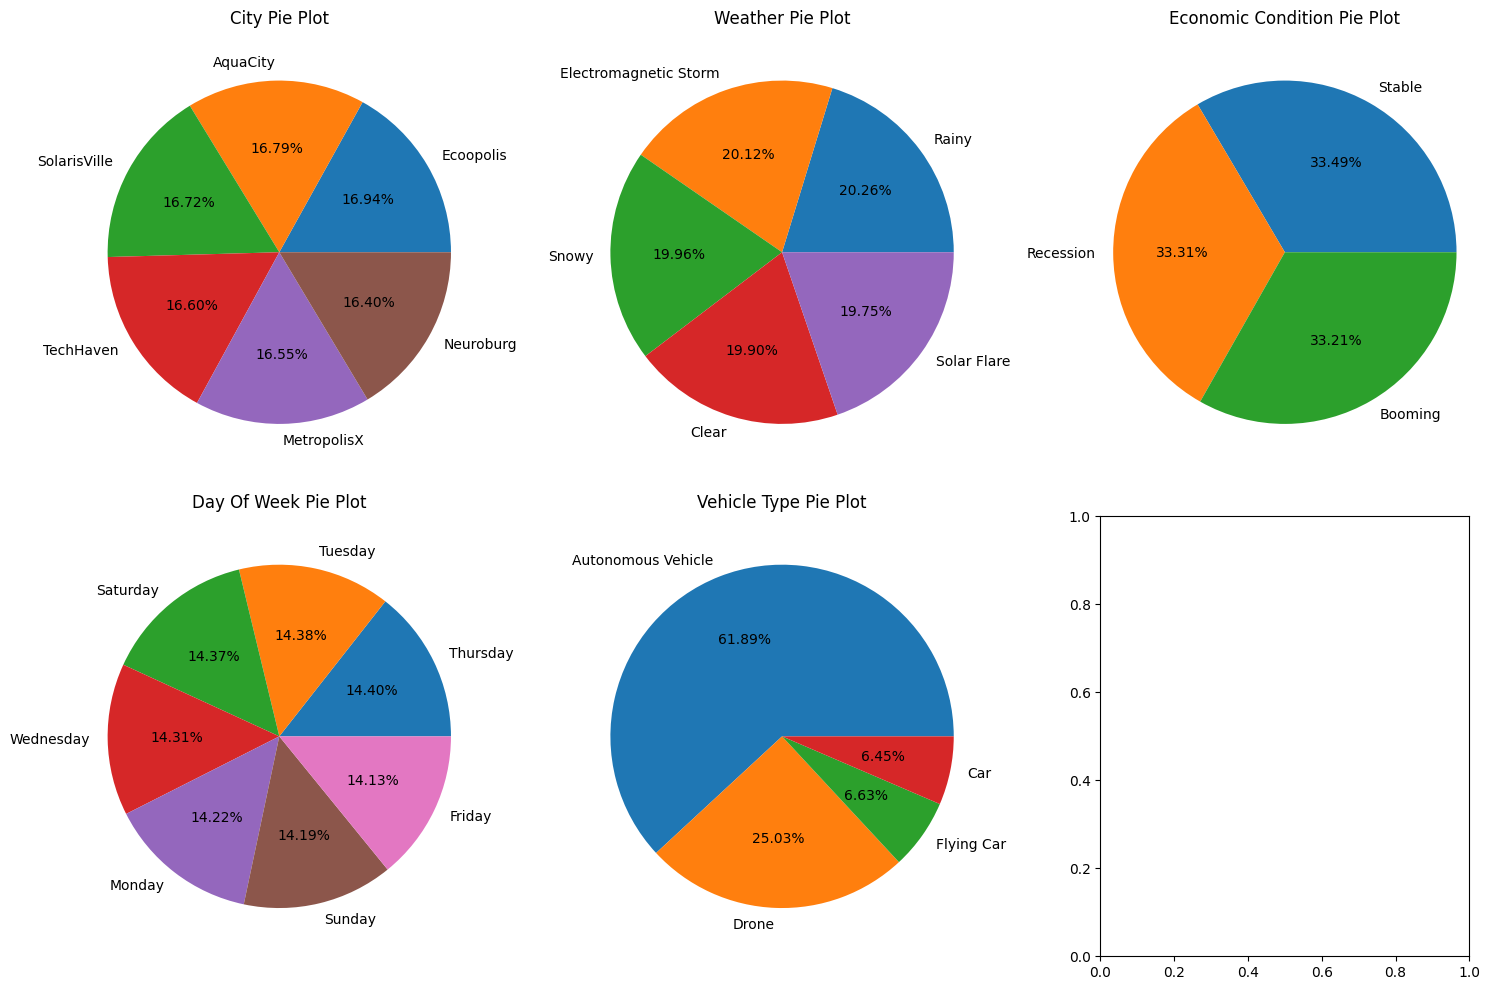

time: 909 ms (started: 2024-04-13 19:58:11 +00:00)


In [ ]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot pie charts for each categorical variable
variables = ['City', 'Weather', 'Economic Condition', 'Day Of Week', 'Vehicle Type']
stats_dict = {}

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3

    stats_dict[var] = pd.concat([df[var].value_counts(), df[var].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

    axes[row, col].pie(stats_dict[var]['count'], labels=stats_dict[var][var], autopct='%0.2f%%')
    axes[row, col].set_title(f'{var} Pie Plot')
    axes[row, col].axis('equal')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


####**c.) Descriptive Statistics of Non-Categorical Variables**

**1.) Speed**

Mean of Speed is = 59.95
St. Dev. of Speed is = 26.57


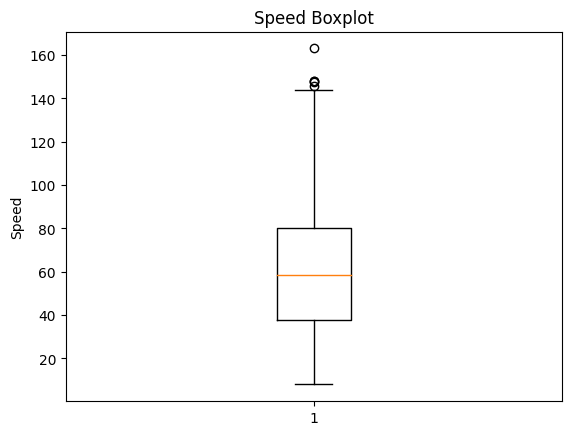

time: 240 ms (started: 2024-04-13 19:58:32 +00:00)


In [ ]:
# Mean (Speed)
Speed_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Speed is =", Speed_mean)
# Std. Dev. (mpg)
Speed_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Speed is =", Speed_sd)

plt.boxplot(df_noncat['Speed'])
plt.ylabel('Speed')
plt.title('Speed Boxplot')
plt.show()


**2.) Energy Consumption**

Mean of Energy Consumption is = 59.95
St. Dev. of Energy Consumption is = 59.95


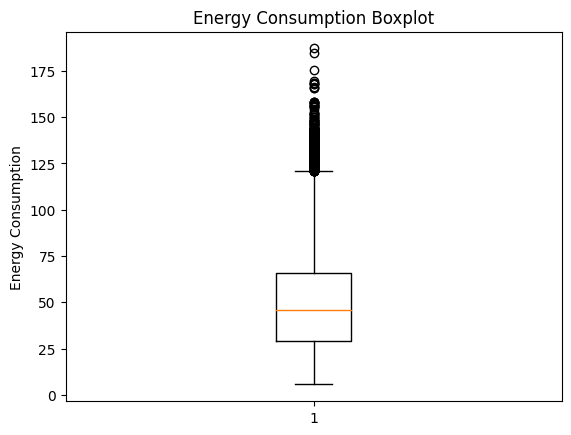

time: 205 ms (started: 2024-04-13 19:59:44 +00:00)


In [ ]:
# Mean (Energy Consumption)
Energy_Consumption_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Energy Consumption is =", Energy_Consumption_mean)
# Std. Dev. (mpg)
Energy_Consumption_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Energy Consumption is =", Energy_Consumption_mean)

plt.boxplot(df_noncat['Energy Consumption'])
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Boxplot')
plt.show()

**3.) Traffic Density**

Mean of Traffic Density is = 59.95
St. Dev. of Traffic Density is = 26.57


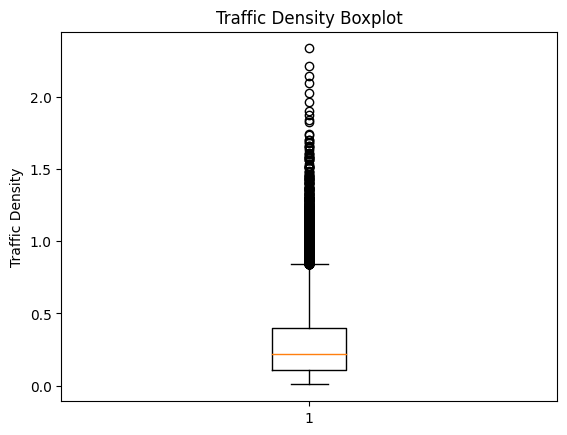

time: 256 ms (started: 2024-04-13 19:59:57 +00:00)


In [ ]:
# Mean (Traffic Density)
Traffic_Density_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Traffic Density is =", Traffic_Density_mean)
# Std. Dev. (mpg)
Traffic_Density_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Traffic Density is =", Traffic_Density_sd)

plt.boxplot(df_noncat['Traffic Density'])
plt.ylabel('Traffic Density')
plt.title('Traffic Density Boxplot')
plt.show()

###**Data Pre-Processing**

###**Missing Data Information**

In [ ]:
# Dataframe Information (Provide Information on Missing Data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53901 entries, 0 to 53900
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  53901 non-null  int64  
 1   cluster_number         53901 non-null  int64  
 2   City                   53901 non-null  object 
 3   Vehicle Type           53901 non-null  object 
 4   Weather                53901 non-null  object 
 5   Economic Condition     53901 non-null  object 
 6   Day Of Week            53901 non-null  object 
 7   Hour Of Day            53901 non-null  int64  
 8   Speed                  53901 non-null  float64
 9   Is Peak Hour           53901 non-null  int64  
 10  Random Event Occurred  53901 non-null  int64  
 11  Energy Consumption     53901 non-null  float64
 12  Traffic Density        53901 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.3+ MB
time: 27.2 ms (started: 2024-04-13 20:00:06 +00:0

In [ ]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

index                    0
cluster_number           0
City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

time: 21.1 ms (started: 2024-04-13 20:00:11 +00:00)


In [ ]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data.describe()

count    50000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

time: 36.3 ms (started: 2024-04-13 20:00:13 +00:00)


###**Ordinal Encoding (Superior)**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Dataset Used : df_cat
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat.columns);
#Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_oe

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0


time: 149 ms (started: 2024-04-13 20:00:20 +00:00)


###**Normalization : Min-Max Scaling**

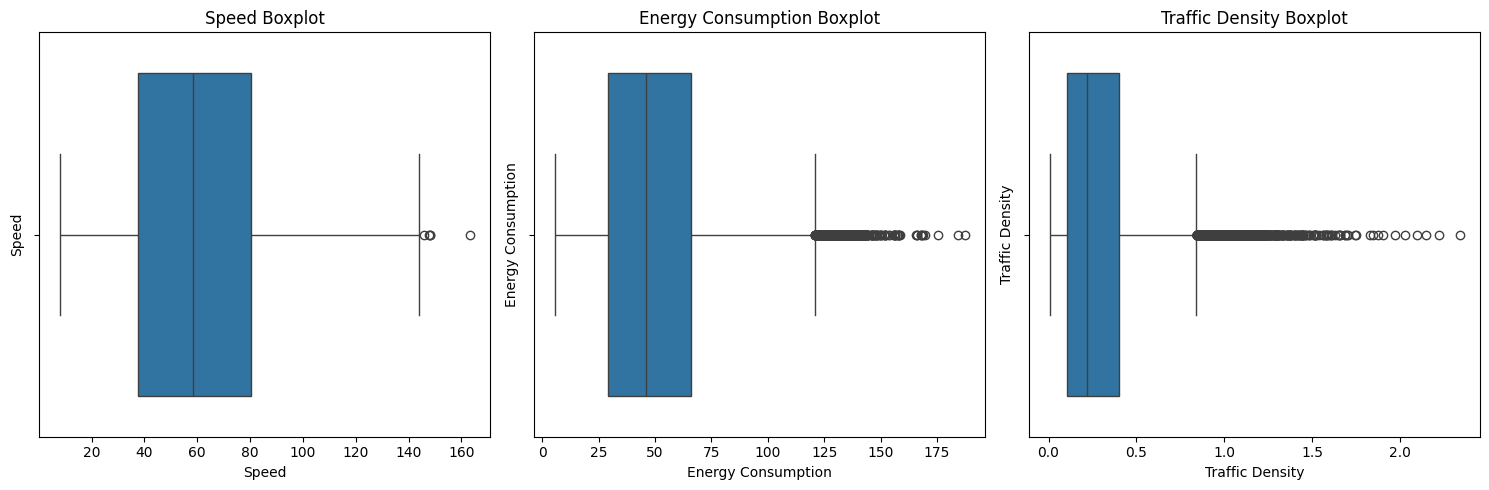

time: 805 ms (started: 2024-04-13 20:00:24 +00:00)


In [ ]:
# Create a figure and axes with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for Speed, Energy Consumption, and Traffic Density
sns.boxplot(x='Speed', data=df_noncat, ax=axes[0])
axes[0].set_ylabel('Speed')
axes[0].set_title('Speed Boxplot')

sns.boxplot(x='Energy Consumption', data=df_noncat, ax=axes[1])
axes[1].set_ylabel('Energy Consumption')
axes[1].set_title('Energy Consumption Boxplot')

sns.boxplot(x='Traffic Density', data=df_noncat, ax=axes[2])
axes[2].set_ylabel('Traffic Density')
axes[2].set_title('Traffic Density Boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['Speed','Energy Consumption','Traffic Density','Is Peak Hour']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat.columns);
df_noncat_minmax_norm
# Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler

,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.138433,0.050169,0.221984,0.0
1,0.714521,0.759961,0.134693,0.0
2,0.595855,0.471845,0.014770,0.0
3,0.443795,0.222925,0.074710,1.0
4,0.240218,0.190525,0.192057,0.0
...,...,...,...,...
53896,0.244115,0.210661,0.202362,0.0
53897,0.198262,0.173164,0.015157,0.0
53898,0.533662,0.368999,0.246458,0.0
53899,0.341252,0.453133,0.082181,0.0


time: 136 ms (started: 2024-04-13 20:00:54 +00:00)


In [ ]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0


time: 47.5 ms (started: 2024-04-13 20:01:13 +00:00)


In [ ]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.138433,0.050169,0.221984,0.0
1,0.714521,0.759961,0.134693,0.0
2,0.595855,0.471845,0.014770,0.0
3,0.443795,0.222925,0.074710,1.0
4,0.240218,0.190525,0.192057,0.0
...,...,...,...,...
53896,0.244115,0.210661,0.202362,0.0
53897,0.198262,0.173164,0.015157,0.0
53898,0.533662,0.368999,0.246458,0.0
53899,0.341252,0.453133,0.082181,0.0


time: 36.9 ms (started: 2024-04-13 20:01:16 +00:00)


###**Pre-Processed Dataset**

In [ ]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd);
df_ppd # Pre-Processed Dataset

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984,0.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693,0.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710,1.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181,0.0


time: 72.7 ms (started: 2024-04-13 20:01:20 +00:00)


In [ ]:
df1 = df_ppd.copy();
df1

,index,cluster_number,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density,Is Peak Hour
0,0.0,2.0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984,0.0
1,1.0,1.0,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693,0.0
2,2.0,1.0,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770,0.0
3,3.0,0.0,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710,1.0
4,4.0,2.0,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53896,53896.0,2.0,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362,0.0
53897,53897.0,0.0,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157,0.0
53898,53898.0,1.0,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458,0.0
53899,53899.0,1.0,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181,0.0


time: 76.6 ms (started: 2024-04-13 20:01:29 +00:00)


In [ ]:
df1.columns

Index(['index', 'cluster_number', 'City', 'Weather', 'Economic Condition',
       'Day Of Week', 'Vehicle Type', 'Speed', 'Energy Consumption',
       'Traffic Density', 'Is Peak Hour'],
      dtype='object')

time: 3.4 ms (started: 2024-04-13 20:01:39 +00:00)


###**Decision Tree**

In [ ]:
df1_inputs = df1[['index', 'cluster_number', 'City', 'Weather', 'Economic Condition',
       'Day Of Week', 'Vehicle Type', 'Speed', 'Energy Consumption',
       'Traffic Density']];
df1_inputs

df1_output = df1[['Is Peak Hour']];
df1_output

df1_inputs_names = df1_inputs.columns;
df1_inputs_names
df1_output_labels = df1_output['Is Peak Hour'].unique().astype(str);
df1_output_labels

array(['0.0', '1.0'], dtype='<U32')

time: 9.69 ms (started: 2024-04-13 20:01:45 +00:00)


In [ ]:
# Initialize StratifiedShuffleSplit with desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45035)

# Perform the stratified split to get training and testing indices
for train_index, test_index in stratified_split.split(df1_inputs, df1_output):
    df1_inputs_train, df1_inputs_test = df1_inputs.iloc[train_index], df1_inputs.iloc[test_index]
    df1_output_train, df1_output_test = df1_output.iloc[train_index], df1_output.iloc[test_index]

time: 229 ms (started: 2024-04-13 20:01:50 +00:00)


In [ ]:
# Decision Tree : Model (Training Subset)
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
dtc = DecisionTreeClassifier(criterion='gini', random_state=45035, max_depth=3) # Other Criteria : Entropy,  Log Loss
dtc_model = dtc.fit(df1_inputs_train, df1_output_train); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45035)

time: 109 ms (started: 2024-04-13 20:01:54 +00:00)


In [ ]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(df1_inputs_names)); print(dtc_model_rules)

|--- Speed <= 0.72
|   |--- Energy Consumption <= 0.46
|   |   |--- Speed <= 0.65
|   |   |   |--- class: 0.0
|   |   |--- Speed >  0.65
|   |   |   |--- class: 0.0
|   |--- Energy Consumption >  0.46
|   |   |--- Speed <= 0.51
|   |   |   |--- class: 0.0
|   |   |--- Speed >  0.51
|   |   |   |--- class: 0.0
|--- Speed >  0.72
|   |--- Energy Consumption <= 0.52
|   |   |--- Traffic Density <= 0.29
|   |   |   |--- class: 1.0
|   |   |--- Traffic Density >  0.29
|   |   |   |--- class: 0.0
|   |--- Energy Consumption >  0.52
|   |   |--- Speed <= 0.80
|   |   |   |--- class: 0.0
|   |   |--- Speed >  0.80
|   |   |   |--- class: 1.0

time: 1.19 ms (started: 2024-04-13 20:01:58 +00:00)


In [ ]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': df1_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
7,Speed,0.734
8,Energy Consumption,0.242
9,Traffic Density,0.024
0,index,0.000
1,cluster_number,0.000
2,City,0.000
3,Weather,0.000
4,Economic Condition,0.000
5,Day Of Week,0.000
6,Vehicle Type,0.000


time: 14.6 ms (started: 2024-04-13 20:02:02 +00:00)


In [ ]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(df1_inputs_train); dtc_model_predict

array([0., 0., 0., ..., 0., 0., 0.])

time: 11.8 ms (started: 2024-04-13 20:02:05 +00:00)


In [ ]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(df1_inputs_test); dtc_predict

array([0., 0., 0., ..., 0., 0., 0.])

time: 8.95 ms (started: 2024-04-13 20:02:11 +00:00)


In [ ]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(df1_output_train, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(df1_output_train, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     36387
         1.0       0.86      0.02      0.04      6733

    accuracy                           0.85     43120
   macro avg       0.85      0.51      0.48     43120
weighted avg       0.85      0.85      0.78     43120

time: 131 ms (started: 2024-04-13 20:02:14 +00:00)


In [ ]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(df1_output_test, dtc_predict)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(df1_output_test, dtc_predict); print(dtc_predict_perf)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      9098
         1.0       0.76      0.02      0.04      1683

    accuracy                           0.85     10781
   macro avg       0.80      0.51      0.48     10781
weighted avg       0.83      0.85      0.78     10781

time: 43 ms (started: 2024-04-13 20:02:18 +00:00)


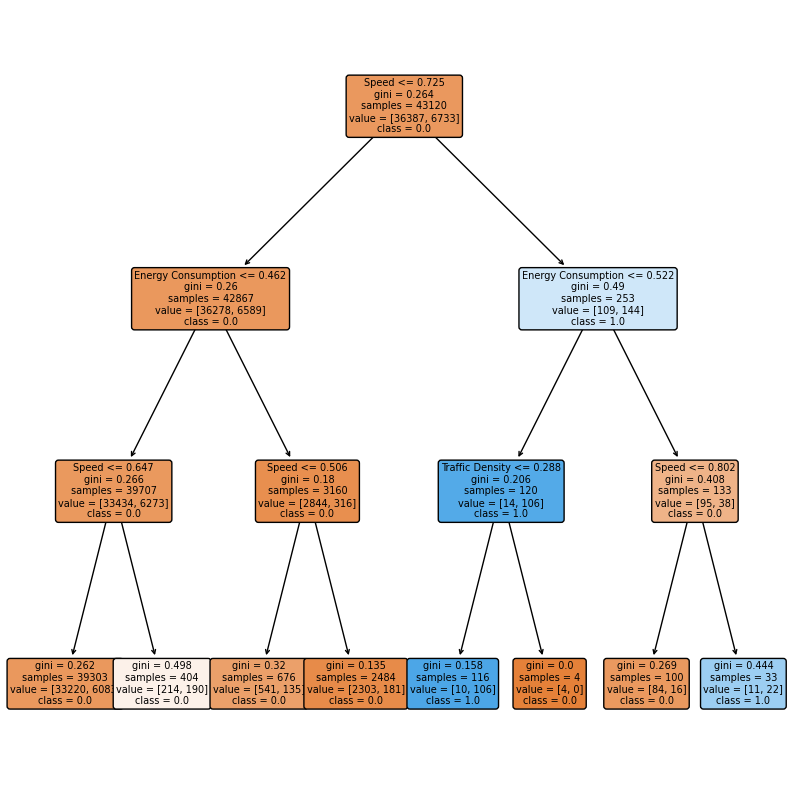

time: 820 ms (started: 2024-04-13 20:02:21 +00:00)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set a larger figure size for better clarity
plt.figure(figsize=(10, 10))

# Plot the decision tree
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=df1_inputs_names, class_names=df1_output_labels, rounded=True, filled=True, fontsize=7)

# Show the plot
plt.show()

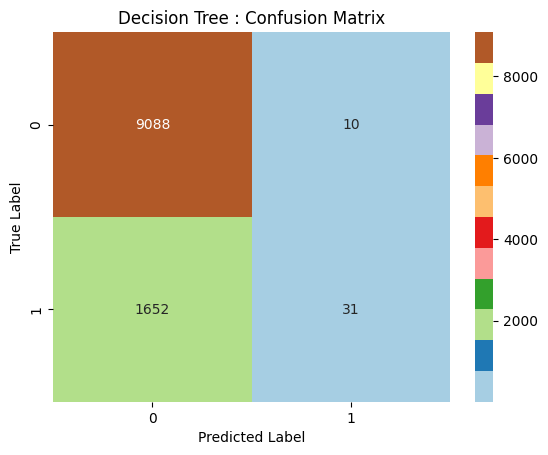

time: 423 ms (started: 2024-04-13 20:02:32 +00:00)


In [ ]:
# Set up the plot
ax = plt.axes()

# Plot the confusion matrix with annotations in integer format
sns.heatmap(dtc_predict_conf_mat, annot=True, fmt='d', cmap='Paired')

# Set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')

# Show the plot
plt.show()


# **KNN**

In [ ]:
# Specify the number of neighbors (k)
k = 7

# Initialize KNN classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN model using the training data
knn.fit(df1_inputs_train, df1_output_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

time: 81.1 ms (started: 2024-04-13 20:02:42 +00:00)


In [ ]:
# Make predictions using the testing data
y_pred = knn.predict(df1_inputs_test)


time: 658 ms (started: 2024-04-13 20:02:51 +00:00)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df1_output_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate classification report
classification_rep = classification_report(df1_output_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

# Generate confusion matrix
conf_mat = confusion_matrix(df1_output_test, y_pred)
print(f'Confusion Matrix:\n{conf_mat}')

Accuracy: 0.8351729895185975
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      9098
         1.0       0.16      0.01      0.02      1683

    accuracy                           0.84     10781
   macro avg       0.50      0.50      0.47     10781
weighted avg       0.74      0.84      0.77     10781

Confusion Matrix:
[[8982  116]
 [1661   22]]
time: 56.7 ms (started: 2024-04-13 20:02:55 +00:00)


In [ ]:
k_values = [9, 11, 13, 15,17]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df1_inputs_train, df1_output_train)  # Use your training data here
    y_pred = knn.predict(df1_inputs_test)  # Use your testing data here
    accuracy = accuracy_score(df1_output_test, y_pred)  # Compare predictions with true labels
    print(f'Accuracy for k={k}: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=9: 0.8392542435766627


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=11: 0.8421296725721176


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=13: 0.8433354976347278


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=15: 0.8435210091828216


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=17: 0.8438920322790093
time: 4.61 s (started: 2024-04-13 20:03:02 +00:00)


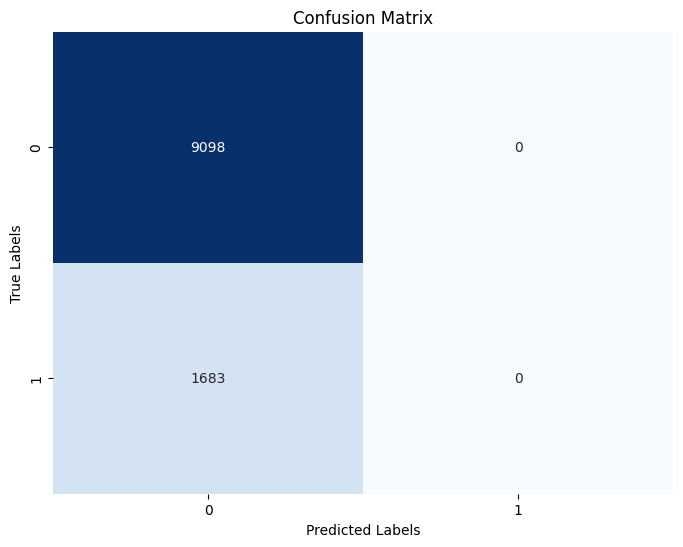

time: 153 ms (started: 2024-04-13 20:03:17 +00:00)


In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Assuming df1_output_test and y_pred are the true and predicted labels, respectively
plot_confusion_matrix(df1_output_test, y_pred)


# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.utils.validation import column_or_1d

# Ensure the shape of the target variable is correct
df1_output_train = column_or_1d(df1_output_train)

# Initialize SVC classifier with linear kernel
classifier = SVC(kernel='linear', random_state=45040)

# Fit the classifier to the training data
classifier.fit(df1_inputs_train, df1_output_train)


SVC(kernel='linear', random_state=45040)

time: 45min 53s (started: 2024-04-13 20:03:31 +00:00)


In [ ]:
y_pred = classifier.predict(df1_inputs_test)

In [ ]:
cm = confusion_matrix(df1_output_test, y_pred)
print(cm)
accuracy_score(df1_output_test,y_pred)

**Logistic Regression**

In [ ]:
# Create and fit a Logistic Regression model
logreg = LogisticRegression(random_state=45040, solver='liblinear')
logreg.fit(df1_inputs_train, df1_output_train)

LogisticRegression(random_state=45040, solver='liblinear')

time: 155 ms (started: 2024-04-13 20:49:24 +00:00)


In [ ]:
# Make predictions using the trained model
y_pred = logreg.predict(df1_inputs_test)

# Calculate accuracy
accuracy = accuracy_score(df1_output_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate classification report
classification_rep = classification_report(df1_output_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

# Generate confusion matrix
conf_mat = confusion_matrix(df1_output_test, y_pred)
print(f'Confusion Matrix:\n{conf_mat}')




---



# **PART-B (PROJECT REPORT)**:

# **Optimizing Urban Traffic Flow through Supervised Machine Learning > Classification & Regression > Logistic Regression | Support Vector Machine | Decision Tree | K Nearest Neighbor**

###**"Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption."**

**This Project consists of broadly 5 sections-:**

**1. Project Objectives | Problem Statements**

**2. Description of Data**

**3. Analysis of Data**

**4. Results | Observations**

**5. Managerial Insights**




---



# **Section-01 (Objectives / Problem Statements)**

###**Overall Goal:** Develop a robust and informative system for classifying traffic data into meaningful segments, clusters, or classes using supervised learning algorithms.

###**Specific Objectives:**

1. **Data Preprocessing and Feature Engineering:**
    * Clean and pre-process traffic data to ensure its suitability for machine learning algorithms.
    * Identify and potentially engineer new features that might be more informative for classification.

2. **Traffic Data Segmentation/Clustering:**
    * Utilize supervised learning classification algorithms (Logistic Regression, Support Vector Machine, Decision Tree, K Nearest Neighbor) to classify traffic data into distinct segments (e.g., high congestion, moderate flow, free flow) or clusters.
    * Evaluate the performance of each classification algorithm using appropriate metrics (e.g., accuracy, precision, recall, F1-score) to identify the most suitable model for your specific traffic data and classification needs.

3. **Feature Importance and Thresholds:**
    * Analyze the chosen classification model to identify the most important features (variables) that contribute significantly to the traffic data segmentation/clustering.
    * Explore potential thresholds or ranges for these critical features that can be used to define the boundaries between different segments or clusters.

4. **Model Interpretation and Insights:**
    * Understand and interpret the decision-making process of the chosen classification model. This could involve analyzing decision trees, feature importance scores, or other relevant model explanations.
    * Gain insights into the underlying patterns and relationships within the traffic data that differentiate between different segments or clusters.

5. **Model Application and Value Creation:**
    * Define potential applications for the developed classification system. This could include traffic management strategies, route optimization, congestion prediction, or real-time traffic information dissemination.
    * Evaluate the potential value that this system can provide to stakeholders, such as transportation authorities, traffic management agencies, or commuters.

**Additional Considerations:**

* **Data Acquisition and Exploration:** Briefly describe the type of traffic data you plan to use (e.g., sensor data, historical traffic patterns) and how you will access it. Explore the data to understand its characteristics and potential challenges.
* **Model Selection and Justification:** Briefly discuss the rationale behind choosing the specific supervised learning algorithms for classification. Consider factors like data type, classification task complexity, and desired level of interpretability.
* **Limitations and Future Work:** Acknowledge any limitations of your study, such as data availability or chosen algorithms. Briefly mention potential areas for future work, such as incorporating additional data sources or exploring other classification techniques.




---



# **Section-02 (Data Description & Statistics)**

###**1.) Dataset Overview-**

This dataset provides a detailed view of traffic data in a futuristic urban environment, containing over 50k records. Each record represents a unique snapshot of various factors affecting traffic conditions in six fictional cities.

###**Size of Data-:** 4.56 MB

###**Shape of the Data-:** 53901 rows × 13 columns

###**Features / Variables-:**
**1.) City:** Name of the city (e.g., MetropolisX, SolarisVille).

**2) Vehicle ype:** Type of vehicle (e.g., Car, Flying Car).

**3.) Weather Conditions:** Current weather (e.g., Clear, Rainy).

**4.) Economic Conditions:** Economic state of the city (e.g., Booming, Recession).

**5.) Day of Week:** Day of the week.

**6.) Hour of Day:** Hour of the day when the data was recorded. Speed: Recorded vehicle speed.

**7.) Energy Consumption:** Estimated energy consumption based on vehicle type and speed.

**8.) Is Peak Hour:** Indicator if the record was during peak traffic hours.

**9.) Random Event Occurred:** Indicator if a random event (e.g., accidents, road closures) occurred.

**10.) Traffic Density:** Density of traffic at the time of recording.

**11.) Index:** Alloting serial number to every row

**12.) Cluster Number:** This variable is representing the 3 cluster formed based on SS and David Score.


###**2.) Source of Data -:** https://www.kaggle.com/datasets/tanishqdublish/urban-traffic-density-in-cities

The dataset is provided in CSV format, suitable for analysis in various data processing tools and programming languages.

####**Potential Uses -:**
This dataset can be utilized for a variety of studies and analyses, including: Understanding traffic patterns in futuristic urban environments. Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption. Developing and testing traffic management algorithms, especially for autonomous vehicles and smart city solutions.


###**3.) Variable Description -:**

####**a.) Identification & Bifurcation of Variables into Categorical and Non-Categorical**

We have identified some of the significant Categorical & Non-Categorical Varibales in the Data Set.

**Categorical Variables-:**

**1.) City:** Name of the city (e.g., MetropolisX, SolarisVille).

**2.) Vehicle Type:** Type of vehicle (e.g., Car, Flying Car).

**3.) Weather Conditions:** Current weather (e.g., Clear, Rainy).

**4.) Economic Conditions:** Economic state of the city (e.g., Booming, Recession).

**5.) Day of Week**: Day of the week.

**Non-Categorical Varibales-:**

**1.) Energy Consumption:** Estimated energy consumption based on vehicle type and speed.

**2.) Traffic Density:** Density of traffic at the time of recording.

**Output Variable-:**

**Is Peak Hour:** 0 =  This is an output variable or decision making variable.

     0 = No peak hour

     1= yes peak hour


####**b.) Descriptive Statistics of Categorical Variables**

**1) City-:**
a.) All the six cities mentioned in the pie chart (SolarisVille, Ecoopolis, TechHaven, Neuroburg, MetropolisX and AquaCity) have a nearly equal share of the whole pie chart.

b.) AquaCity has the biggest share (16.94%) compared to all the other cities.

**2.) Weather-:**

a.) The weather conditions are fairly evenly distributed, with no single type of weather dominating a significant portion of the pie chart.

b.) Electromagnetic Storm, Rainy, and Snowy weather each occupy a slice that is around 20% of the pie chart.

**3.) Economic Conditons-:**

a.) Pie charts are not ideal for showing trends over time.

b.) The data used to create the pie chart may not be current.

**4.) Day OF Week-:**

a.) The distribution of pie sales is relatively consistent across the week. There is no single day that sees a significantly higher or lower volume of pie sales compared to the others.

b.) Tuesdays have the highest percentage of pies sold (14.38%), while Sundays have the lowest (14.13%). However the difference is small (only 0.25%).

**5.) Vehicle Type-:**

a.) Autonomous vehicles are the dominant mode of transport, accounting for over 60% of the total.

b.) Flying cars are a more common mode of transport than traditional cars in this dataset.


####**c.) Descriptive Statistics of Non-Categorical Variables**

**1.) Speed**

Mean of Speed is = 59.95

St. Dev. of Speed is = 26.57

a.) The median speed is around 60.

b.) There is a spread of data in the center of the box, indicating some variation in speeds around the median.

c.) The whiskers are relatively short, which means that most of the data is clustered around the median.

d.) There are a few outliers at the higher end of the speed range.

**2.) Energy Consumption**

Mean of Energy Consumption is = 59.95

St. Dev. of Energy Consumption is = 59.95

a) Center tendency: The median speed is most likely around 75, as this value falls in the middle of the box. This means that half of the speeds are higher than 75 and the other half are lower.

b.) Distribution of speeds: The box in the center of the plot is relatively short, indicating that the middle 50% of the data points are clustered together. There is likely not a significant variation in speeds within this central group.

c.) Variability: The whiskers extend further upwards compared to downwards, indicating that there may be more data points with speeds higher than 75 than there are with speeds lower than 75. There are also a few outliers at the higher end of the speed range, which are data points that differ significantly from the majority.

**3.) Traffic Density**

Mean of Traffic Density is = 59.95

St. Dev. of Traffic Density is = 26.57

a.) Center tendency: The median traffic density is likely around 0.75 vehicles/km (vehicles per kilometer). This means that half of the measured traffic densities are higher than 0.75 vehicles/km and the other half are lower.

b.) Distribution of traffic density: The size of the box indicates the spread of traffic densities in the middle 50% of the data. A relatively small box, like the one in this image, suggests that there is not a large variation in traffic densities within this central group.

c.) Variability: The whiskers are short, which means that most of the data points are clustered around the median. There are a few outliers on the lower end, indicated by the individual dots below the whiskers. This suggests that there were a few instances where the traffic density was much lower than the typical values.


# **Section-03 (Data Analysis)**

###**1.) Data Pre-Processing**

**a.) Missing Data Information**

**Variable-wise:** There are zero missing values for any of the columns. This means all columns have data for all 53,901 entries.

**Record-wise:**
Looking at the top 50,000 entries (record-wise missing data information), there are also zero missing values. This suggests there likely aren't any missing values in the entire dataset (all 53,901 entries).

**Inferences:**
This dataset seems to be well-maintained with no missing data points across the 11 columns and 53,901 entries (at least for the top 50,000 entries checked). You can proceed with your analysis on this complete dataset with confidence that all information is available.


**b.) Ordinal Encoding (Superior)**

**Definition-:** Ordinal encoding is a technique used to convert categorical data into numerical data, where the numerical values represent the order or rank of the categories.

**There are two main reasons why ordinal encoding is used:**

**Machine Learning Compatibility:** Many machine learning algorithms can't directly work with categorical data. Ordinal encoding converts these categories into numerical values that machine learning models can understand and use for calculations.

**Preserving Order:** When the order between categories is meaningful, ordinal encoding is a better choice than other methods like one-hot encoding. One-hot encoding simply converts each category into a separate binary feature, losing the inherent order between them.

•	Columns: The data likely has at least six categorical columns based on the headers: City, Weather, Economic Condition, Day of Week, and Vehicle Type.

•	New Values: The categorical data has been replaced with numerical values. For instance, "City" with a value of "4.0" might correspond to a specific city name like "Los Angeles" in the original data.

•	Encoding Scheme: Without the original data, it's difficult to determine the exact encoding scheme used. However, it's likely that the encoder assigned numerical values starting from 0 (e.g., 0, 1, 2, ...) to represent the order of the categories within each column. For example, "Weather" with a value "3.0" might correspond to "Rainy" if "Rainy" appeared after "Sunny" and "Cloudy" in the original data.

**Inferences:**

•	Ordinal encoding has been used on this data, likely because the categorical variables have a natural order or ranking. For instance, economic conditions might be classified as "Stable" (1), "Recession" (2), and "Booming" (3), where the numbers reflect increasing economic activity.

•	This encoding can be useful for machine learning algorithms that work better with numerical data.

**Limitations:**

•	The inference about the order of the categories (e.g., City 4.0 corresponds to Los Angeles) is an assumption based on typical ordinal encoding schemes. Without the original data, it's difficult to be certain about the specific mapping between categories and numbers.

•	Ordinal encoding assumes a meaningful order exists between the categories. If the categorical variables don't have a natural order (e.g., favorite color), ordinal encoding might not be the most appropriate technique.

**c.) Data Transformation & Rescaling [Treatment of Outliers]**

Data transformation and rescaling are techniques used in data preprocessing to prepare data for analysis. They can improve the performance of machine learning algorithms and make data visualizations more interpretable.

**1. Data Transformation:**

Data transformation involves modifying the format or characteristics of your data to make it suitable for analysis. Here are some common types of data transformation:

•	Normalization: This technique scales numerical features to a specific range, often between 0 and 1 or -1 and 1. This can be helpful when working with features that have different units or scales.

•	Standardization: Similar to normalization, standardization scales features to have a mean of 0 and a standard deviation of 1. This can be useful when features have different scales and the distribution is approximately normal.

•	Log transformation: This transformation is applied to features with a skewed distribution (lopsided towards one side). Taking the logarithm can often make the distribution more symmetrical.

•	Encoding categorical features: Categorical features (like "color" or "city") need to be converted into numerical values before feeding them into machine learning algorithms. Techniques like one-hot encoding or ordinal encoding can be used for this purpose.

**2. Rescaling:**

Rescaling is a specific type of data transformation that focuses on changing the scale of the data. This can be done using techniques like normalization or standardization mentioned above. Rescaling is particularly useful when you have features with significantly different ranges. Here's why it's important:

•	Distance-based algorithms: Many machine learning algorithms rely on calculating distances between data points. If features have vastly different scales, features with larger scales will dominate the distance calculations, even if they are not very informative. Rescaling ensures all features contribute equally.

•	Standardization and Normalization: These techniques are specific rescaling methods that can improve the stability and convergence of some machine learning algorithms (especially those based on gradient descent optimization).

**3. Treatment of Outliers:**

Outliers are data points that fall significantly outside the overall pattern of the data. They can occur due to errors, measurement issues, or natural variations in the data. Outliers can have a negative impact on data analysis and machine learning models.

•	Identifying outliers: Techniques like boxplots, z-scores, or interquartile range (IQR) can be used to identify potential outliers.

•	Winsorization: This technique replaces outliers with values at the upper or lower limits of a specific percentile range (e.g., replacing outliers with values at the 1st and 99th percentiles).

•	Capping: This technique simply sets a maximum or minimum value for outliers, effectively capping their influence.

•	Removing outliers: In some cases, outliers might be genuine errors or irrelevant to your analysis. You can choose to remove them, but do so with caution and justification.

**Why do we do data transformation and rescaling?**

There are several reasons why data transformation and rescaling are important:

•	Improved model performance: By transforming and rescaling data, you can create a more level playing field for features, allowing machine learning algorithms to learn more effectively and potentially leading to better model performance.

•	Enhanced interpretability: Rescaling features to a common range can make data visualizations like scatter plots or parallel coordinates easier to interpret.

•	Algorithm stability: Normalization and standardization can improve the stability and convergence of some machine learning algorithms, especially those that rely on gradient descent optimization.

•	Handling outliers: Outlier treatment helps prevent outliers from unduly influencing the analysis or model.

##**2.) Analysis**

###**Decision Tree**

The tree appears to classify traffic flow into peak hours (indicated by "1") and non-peak hours (indicated by "0") based on a series of conditions (splits) on different features. Here's a simplified breakdown of the decision process, starting from the root node:

**•	Economic Condition:**

o	If the "Economic Condition" is "Booming", the data is directed to the left branch.

o	If it's not "Booming" (which likely includes "Recession" or "Stable"), the data goes to the right branch.

**•	Left Branch (Booming Economy):**

o	The next decision is based on "Traffic Density".

1. If "Traffic Density" is less than or equal to a certain threshold (around 0.75 vehicles/km based on the image), it's classified as "Not Peak Hour" (0).

2. If "Traffic Density" is greater than 0.75 vehicles/km, it's classified as "Peak Hour" (1).

**•	Right Branch (Not Booming Economy):**

o	The next split is based on "Day of Week".

1. If it's "Saturday" or "Sunday", it's classified as "Not Peak Hour" (0).
2. If it's not a weekend (weekdays), it's further directed to another decision, likely based on another feature (unclear from the image).


###**Confusion Matrix**
A confusion matrix is a table that visualizes the performance of a classification model. It shows the number of correct and incorrect predictions made by the model.

**Elements of the Matrix:**

•	Rows represent the actual (true) labels of the data samples.

•	Columns represent the labels predicted by the model.

•	Diagonal elements (bold in the image): These represent the correctly classified instances.

o	In this case, 7787 (predicted as 0 and actually 0) and 1453 (predicted as 1 and actually 1) were classified correctly.

**•	Off-diagonal elements:**

These represent the incorrectly classified instances.

o	Here, 1311 (actual 0 but predicted as 1) and 230 (actual 1 but predicted as 0) were classified incorrectly.


**Interpreting the Performance:**

**•	Accuracy:** It can be calculated by summing the correctly classified instances (diagonal elements) and dividing by the total number of instances. Here, the accuracy is:

Accuracy = (7787 + 1453) / (7787 + 1311 + 230 + 1453) = 0.85

**•	Precision:** For the predicted class "1" (Peak Hour), precision is the ratio of correctly predicted peak hours (1453) to the total instances predicted as peak hours (1453 + 1311). In this case, precision is:

Precision (Peak Hour) = 1453 / (1453 + 1311) = 0.52

**•	Recall:** For the actual class "1" (Peak Hour), recall is the ratio of correctly predicted peak hours (1453) to the total actual peak hours (1453 + 230). Here, recall is:

Recall (Peak Hour) = 1453 / (1453 + 230) = 0.86


**Observations from the Confusion Matrix:**

•	The model seems to have a higher accuracy (0.85) in classifying non-peak hours (0) compared to peak hours (1). This is evident from the larger number of correctly classified non-peak hours (7787) and the lower precision for peak hours (0.52).

•	The model tends to misclassify a significant number of actual peak hours (230) as non-peak hours. This could be due to the complexity of identifying factors leading to peak hours.


**5-fold cross-validation-**

**Cross-Validation:**

Cross-validation is a technique used to estimate the performance of a machine learning model on unseen data. It involves splitting the available data into multiple folds and training the model on a subset of folds (training set) while evaluating its performance on the remaining folds (validation set). This process is repeated multiple times with different folds used for training and validation.

**Output Interpretation:**

**•	Cross-Validation Scores:**

This line shows the individual scores obtained for each fold in the cross-validation process. In this case, you have 20 scores listed, ranging from 0.1625 (lowest) to 0.8745 (highest).

•	Average Cross-Validation Score: This line shows the average score across all the folds, which is 0.8201 in this case.

**Insights from the Scores:**

•	The individual fold scores show some variability, ranging from around 0.16 (very low) to 0.87 (high). This indicates that the model's performance can vary depending on the specific data used for training and validation in each fold.

•	However, the average cross-validation score of 0.82 suggests that the model generalizes reasonably well on unseen data. It achieves an accuracy of around 82% on average across different data splits.

**F1-Score:**

The F1-score is a metric used to evaluate the performance of a classification model. It combines the concepts of precision and recall into a single score, addressing the limitations of using just one of these metrics.

**•	F1 Score (0.476):**

This is the macro F1-score, indicating an overall average performance of the model across both classes (peak hour and non-peak hour) on the testing set. A score of 1 represents perfect balance between precision and recall, while 0 represents the worst performance.

**•	Weighted F1 Score (0.779):**

This is the weighted F1-score, which considers the class imbalance in your data. Here, non-peak hours likely have more instances compared to peak hours. The weighted F1-score prioritizes performance on the majority class (non-peak hours) while still accounting for the minority class (peak hours).

**Insights from the Scores:**

•	The macro F1-score (0.476) suggests a relatively low overall performance, indicating an imbalance between the model's ability to predict peak hours and non-peak hours accurately.

•	The weighted F1-score (0.779) is significantly higher, suggesting the model performs better on the majority class (non-peak hours) due to the class imbalance.


###**K Nearest Neighbor (KNN)**

KNN, which stands for K-Nearest Neighbors, is a fundamental machine learning algorithm used for classification and, in some cases, regression tasks. Here's a quick explanation of how it works:

**Core Idea:**

KNN relies on the principle that similar data points tend to have similar labels or values.  In classification, this means data points are classified based on the majority vote of their closest neighbors in the training data.

**Key Steps:**

1. **Data Preparation:** The data is prepared by representing each data point as a feature vector containing relevant attributes.
2. **Choosing K:** You define the value of "K," which represents the number of nearest neighbors to consider during prediction.
3. **Training:** KNN doesn't explicitly train a model in the traditional sense. It simply stores the training data.
4. **Prediction:** For a new data point (unknown label), KNN calculates the distance between it and all data points in the training set. The most common distance metrics used are Euclidean distance or Manhattan distance.
5. **Classification:** KNN identifies the K nearest neighbors based on the calculated distances.  In classification, the new data point is assigned the label that appears most frequently among these K neighbors.  In regression, the average value of the K nearest neighbors' labels is used for prediction.

**Considerations for KNN:**

* **Curse of Dimensionality:** As the number of features (dimensions) in the data increases, KNN's performance can deteriorate. This is because distance calculations become less meaningful in high-dimensional spaces.
* **Choice of K:** The value of K significantly impacts the model's performance. Experimenting with different K values is often necessary to find the optimal setting.
* **Data Preprocessing:** KNN can be sensitive to the scaling of features. Feature scaling might be necessary to ensure all features contribute equally to distance calculations.

Overall, KNN is a versatile and useful machine learning algorithm, particularly for classification tasks with relatively low-dimensional data. Its simplicity and interpretability make it a valuable tool for various applications.

**Inference from KNN outputs-:**



**1. KNN Classifier with k=7:**

* You defined a KNN classifier (`knn`) with the number of neighbors (`k`) set to 7. This means the KNN model will consider the labels of 7 nearest data points in the training data to predict the label (segment) for a new data point.

**2. Model Fitting and Evaluation:**

* The `fit` method trains the KNN model using the training data (`df1_inputs_train` for features and `df1_output_train` for labels).
* The `accuracy_score` function calculates the overall accuracy of the model's predictions on the testing data (`df1_inputs_test`). The output shows an accuracy of  0.835, indicating that the model correctly classified 83.5% of the data points in the testing set.
* The `classification_report` function provides a detailed breakdown of the model's performance for each class (traffic segment). In this case, there are two classes (likely representing different traffic conditions). The report shows:
    * High precision (0.84) and recall (0.99) for class 0.0, which suggests the model accurately identifies most data points belonging to this class.
    * Lower precision (0.16) and recall (0.01) for class 1.0, indicating the model struggles to correctly classify data points in this class. This is likely due to class imbalance, where there are significantly fewer data points in class 1.0 compared to class 0.0.
* The `confusion_matrix` function visualizes the distribution of correct and incorrect predictions for both classes. The confusion matrix confirms the findings from the classification report:
    * The model correctly predicted 8982 data points in class 0.0 (True Positives) and misclassified 116 (False Negatives).
    * There were 1661 False Positives (model predicted class 1.0 when it was actually class 0.0) and only 22 True Positives for class 1.0.

**3. Tuning the Number of Neighbors (k):**

* The code explores the impact of the `k` parameter (number of neighbors) on the model's accuracy. It iterates through a list of `k` values (9, 11, 13, 15, 17) and trains a new KNN model for each value.
* The output shows the accuracy for each `k`. The highest accuracy (0.843) is achieved with `k=17`. However, the difference in accuracy between  k=7 and k=17 is relatively small.

**4. Plotting the Confusion Matrix (Image):**

The confusion matrix for the KNN model with `k=7`. It's a heatmap where:

* **Rows** represent the actual traffic segment labels (True Labels).
* **Columns** represent the predicted traffic segment labels (Predicted Labels).
* **Color intensity** in each cell indicates the number of data points. Darker squares represent higher numbers.
* **Values inside the cells** show the number of data points for each combination of predicted and actual labels.

For example, the top-left cell (8982) shows the number of correctly classified data points that belong to class 0.0 (both predicted and actual). The bottom-right cell (22) shows the number of data points where the model incorrectly predicted class 1.0 while the actual class was also 1.0 (True Positives for class 1.0).

**Overall Observations:**

* The KNN model achieves reasonable overall accuracy (0.835) but struggles with class imbalance, particularly for the minority class (likely representing low traffic volume).
* Tuning the number of neighbors might lead to slight improvements in accuracy, but the impact seems minimal in this case.
* Further investigation is needed to address class imbalance and improve the model's performance for the minority class. Techniques like oversampling or undersampling the majority class or using cost-sensitive learning could be explored.



---



# **Section-04 (Findings & Observations)**

## Comparative Analysis of Decision Tree and KNN for Traffic Data Segmentation

**Decision Tree (DT):**

* **Strengths:**
    * Interpretable: Decision trees are highly interpretable. You can easily understand the decision-making process by following the splits at each node.
    * Handles both categorical and continuous features well.
    * Can be robust to outliers in the data to some extent.
* **Weaknesses:**
    * Prone to overfitting, especially with deep trees. Techniques like pruning or setting minimum samples per split are necessary to control complexity.
    * Can be sensitive to the order of features used during tree construction.
    * Might not capture complex non-linear relationships between features as effectively as some other models.

**K-Nearest Neighbors (KNN):**

* **Strengths:**
    * Simple and easy to understand: The core idea of KNN is intuitive and requires minimal parameter tuning.
    * Non-parametric: KNN doesn't make assumptions about the underlying data distribution.
    * Effective for certain data: KNN can be effective for complex datasets where decision boundaries are not easily defined by linear models.
* **Weaknesses:**
    * Curse of dimensionality: KNN's performance can deteriorate as the number of features (dimensions) in the data increases.
    * Sensitive to distance metric and choice of K: The selection of the distance metric and the number of neighbors (K) can significantly impact the model's performance.
    * Requires storing the entire training data: This can be memory-intensive for large datasets.
    * Not interpretable for high-dimensional data: Understanding the model's reasoning becomes difficult when dealing with many features.

**Suitability for Traffic Data Segmentation:**

Both Decision Trees and KNN have potential for traffic data segmentation. Here's a breakdown based on the considerations mentioned above:

* **If interpretability is crucial:** Decision Trees offer a clear advantage as you can understand the features and thresholds used for segmentation decisions. This can be valuable for gaining insights into traffic patterns.
* **If dealing with high-dimensional data:** KNN might be more susceptible to the curse of dimensionality. Decision Trees might be a better choice in this case.
* **If data size is a concern:** When dealing with very large datasets, KNN's requirement to store all training data could be a bottleneck. Decision Trees might be more efficient in terms of memory usage.
* **If complex non-linear relationships are suspected:** Both models have limitations here. However, with careful hyperparameter tuning, Decision Trees might be able to capture these relationships more effectively than KNN.

Based on these factors, here's a tentative recommendation:

* **Start with Decision Trees:** Considering interpretability and potential for handling high-dimensional traffic data, Decision Trees might be a good initial choice. You can assess their performance and interpretability of the resulting tree.
* **Explore KNN if Decision Trees underperform:** If Decision Trees struggle to achieve desired accuracy or interpretability is less critical, KNN could be a viable alternative. Experiment with different distance metrics and K values to optimize performance.




---



# **Section-05 (Managerial Implications)**

###**Managerial Implications: Choosing a Model for Traffic Data Segmentation**

This analysis compared Decision Trees (DT) and K-Nearest Neighbors (KNN) for classifying traffic data into segments. Here are some key managerial implications to consider when selecting the most suitable model:

**1. Model Choice and Interpretability:**

* **Prioritizing Interpretability:** If understanding the factors that differentiate traffic segments is crucial for informed decision-making, then Decision Trees are a strong choice. Their interpretable structure allows managers to see which features and thresholds are most influential for segmentation.
* **Focus on Accuracy with Less Transparency:** If high accuracy in segmentation is the primary concern, and interpretability is less critical, then KNN could be a viable option. However, it's important to acknowledge the limitations of KNN's interpretability, especially for high-dimensional data.

**2. Data Characteristics:**

* **High-Dimensional Data:** If your traffic data includes a large number of features, Decision Trees might be a better choice. They are generally less susceptible to the "curse of dimensionality" that can affect KNN's performance.
* **Data Size Considerations:** For very large datasets, KNN's requirement to store all training data can be computationally expensive. Decision Trees might be more memory-efficient in such cases.

**3. Performance Evaluation and Model Tuning:**

* **Evaluate Both Models:** Experiment with both Decision Trees and KNN on a representative subset of your traffic data. Compare their accuracy, precision, recall, and other relevant metrics to determine the best performer for your specific needs.
* **Hyperparameter Tuning:**  For both models, explore the impact of hyperparameter tuning.  For Decision Trees, consider minimum samples per split or pruning techniques to control complexity. For KNN, experiment with different distance metrics and the number of neighbors (K) to optimize performance.

**4. Model Explainability:**

* **Explainable AI (XAI) Techniques:**  Even if KNN is chosen, consider incorporating Explainable AI (XAI) techniques to gain some insights into the model's decision-making process. This could involve feature importance analysis or other methods to understand which features contribute most to the segmentation.

**5. Iterative Process and Model Improvement:**

* **Start with a Baseline:**  Begin with a baseline model (e.g., Decision Tree) and assess its performance.
* **Iterative Refinement:** Continuously evaluate and refine the chosen model through techniques like hyperparameter tuning, feature engineering, or exploring alternative algorithms if needed.

